<a href="https://colab.research.google.com/github/Babayaga-18/file/blob/master/online_retail_store_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt


In [ ]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-03-05 16:57:18--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [     <=>            ]  22.62M  23.0MB/s    in 1.0s    

2025-03-05 16:57:19 (23.0 MB/s) - ‘online+retail.zip’ saved [23715478]



In [ ]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [ ]:
df = pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo':'string','StockCode':'string','Description':'string','Country':'string'})
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


DATA CLEANING: HANDLING MISSING VALUES

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
df[df.StockCode == '22139'].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [ ]:
most_freq = df[['StockCode','Description']].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35954,counted,1
4788,35954,check,1
4789,35923,check,1
4790,35915C,damaged,1


In [ ]:
most_freq[most_freq['StockCode']=='85123A'].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [ ]:
most_freq = most_freq.groupby('StockCode').head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4767,35600A,Found by jackie,1
4769,35597B,BLACKCHRISTMAS TREE 30CM,1
4770,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,1
4777,37330,BIG POLKADOT MUG,1


In [ ]:
most_freq.columns = ['StockCode','freq_description','count']
df1 = df.merge(most_freq, on='StockCode', how='left')
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [ ]:
df1['Description'] = df1['freq_description']

In [ ]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [ ]:
df1.dropna(subset = ['Description'], inplace=True)
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_description,0
count,0


In [ ]:
df1.drop(columns =['freq_description','count'], inplace=True)
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [ ]:
df1[df1['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
df2 = df1[(df1.UnitPrice>0) & (df1.Quantity>0)]
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [ ]:
df3 = df2.copy()

In [ ]:
df3['Total_Sales'] = df3['Quantity'] * df3['UnitPrice']
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df3['Month'] = df3['InvoiceDate'].dt.month

In [ ]:
df3.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Month
349313,567485,22560,TRADITIONAL MODELLING CLAY,4,2011-09-20 13:52:00,1.25,15026.0,United Kingdom,5.00,9
301372,563257,22431,WATERING CAN BLUE ELEPHANT,6,2011-08-15 12:07:00,1.95,13799.0,United Kingdom,11.70,8
156637,550156,21703,BAG 125g SWIRLY MARBLES,96,2011-04-14 15:02:00,0.42,17381.0,United Kingdom,40.32,4
144628,548780,22851,SET 20 NAPKINS FAIRY CAKES DESIGN,12,2011-04-04 12:37:00,0.85,13294.0,United Kingdom,10.20,4
258175,559554,82494L,WOODEN FRAME ANTIQUE WHITE,48,2011-07-11 10:12:00,2.55,14258.0,United Kingdom,122.40,7


VISUALIZATION & EDA

#Plot monthly sales


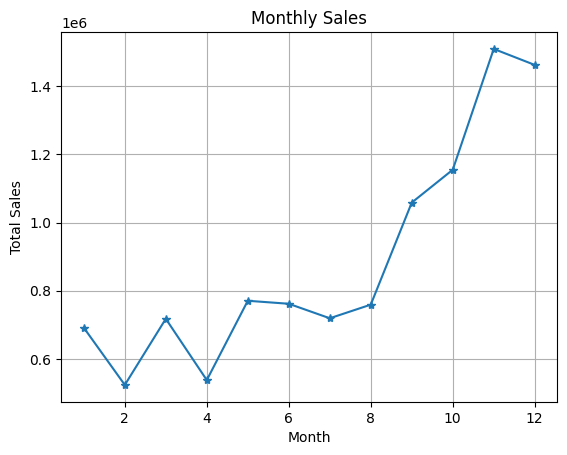

In [ ]:
monthly_sales = df3.groupby('Month')['Total_Sales'].sum()
monthly_sales.plot(kind = 'line', title = 'Monthly Sales',marker='*')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

Insights

 Total sales started rising up in August having a peak in November. This is likely due to the holiday season at the end of the year.

In [ ]:
top_countries = df3.groupby('Country')['Total_Sales'].sum().sort_values(ascending=False)
total_Sales = top_countries.sum()
percent = (top_countries/ total_Sales)*100
percent.head(5)

,Total_Sales
Country,
United Kingdom,84.611315
Netherlands,2.676055
EIRE,2.657376
Germany,2.145626
France,1.966076


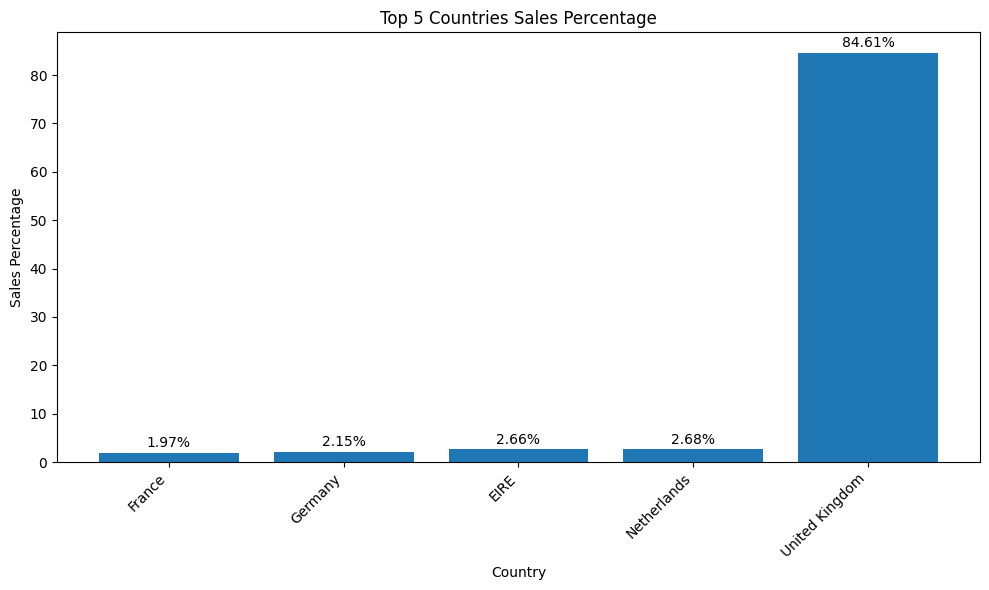

In [ ]:
# prompt: use the above observation to plot bar chart of top_5_countries wise sales in percentage and show the y axis data in percentage values and also input percentage values at top of each bar.

import matplotlib.pyplot as plt

# Assuming top_5_countries is already calculated as in the provided code
# top_5_countries = ...

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(percent.head(5).index, percent.head(5))

# Add percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

plt.xlabel("Country")
plt.ylabel("Sales Percentage")
plt.title("Top 5 Countries Sales Percentage")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.gca().invert_xaxis() # Invert y-axis to show highest sales at the top
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


#Recency_Freqency_Monetary Analysis

In [ ]:
 current_date = df3['InvoiceDate'].max()+pd.Timedelta(days=1)
 current_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
rfm = df3.groupby('CustomerID').agg({'InvoiceDate': lambda x: (current_date - x.max()).days,
                                     'InvoiceNo': 'count',
                                     'Total_Sales': 'sum'})
rfm.columns = ['Recency','Frequency','Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
# Segment customers based on RFM
rfm['R_Quartile'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1])
rfm['F_Quartile'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4])
rfm['M_Quartile'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4])
rfm['RFM_score'] = rfm[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
rfm.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4


In [ ]:
rfm.sort_values('RFM_score', ascending=False).head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_score
CustomerID,,,,,,,
18102.0,1,431,259657.30,4,4,4,12
14367.0,8,524,9261.52,4,4,4,12
17625.0,18,315,2047.00,4,4,4,12
15484.0,1,188,3594.31,4,4,4,12
14395.0,2,350,3507.71,4,4,4,12


In [ ]:
## Cusotomer churn analysis
## Defining churn threshold (e.g., 90 days without purchase)
churn_threshold = 90
churned_cusotmer = rfm[rfm['Recency']>churn_threshold]
churned_cusotmer.sample(5)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_score
CustomerID,,,,,,,
15095.0,104,47,1370.60,2,3,3,8
13802.0,139,60,4599.42,2,3,4,9
17597.0,214,55,2044.37,1,3,4,8
14271.0,226,10,112.32,1,1,1,3
13887.0,204,19,349.55,1,2,2,5


Number of Churned Cusotmers: 1449


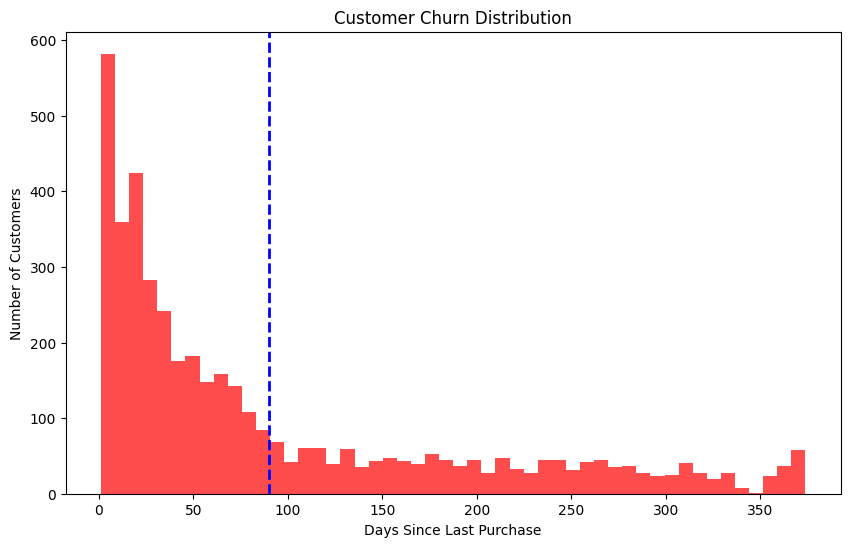

In [ ]:
print('Number of Churned Cusotmers:',len(churned_cusotmer))
plt.figure(figsize=(10,6))
plt.hist(rfm['Recency'],bins = 50, color = 'red', alpha = 0.7)
plt.axvline(x=churn_threshold, color='blue', linestyle='dashed', linewidth=2)
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Distribution')
plt.show()